Ouverture et description du fichier

In [1]:
import pandas as pd

# Chargement des fichiers
test_input_train = pd.read_csv("train_input.csv")
test_input_real = pd.read_csv("test_input.csv")
train_output = pd.read_csv("train_output.csv")  # Ajout de la ligne manquante

# Fusion des inputs
train_input = pd.concat([test_input_train, test_input_real], ignore_index=True)

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_5356\2428514472.py:4: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  test_input_train = pd.read_csv("train_input.csv")
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_5356\2428514472.py:5: DtypeWarning: Columns (16,17,29,30,31,126,128,129,132,133,135,138,371) have mixed types. Specify dtype option on import or set low_memory=False.
  test_input_real = pd.read_csv("test_input.csv")


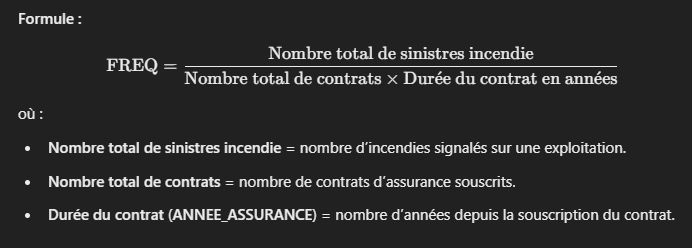

Nettoyage du fichier

In [2]:
import pandas as pd

# Afficher le nombre de lignes et de colonnes de chaque fichier
print(f"üìä Nombre de lignes dans train_input : {train_input.shape[0]}")
print(f"üìÇ Nombre de colonnes dans train_input : {train_input.shape[1]}")
print(f"üìÇ Colonnes de train_input :\n{list(train_input.columns)}\n")

print(f"üìä Nombre de lignes dans train_output : {train_output.shape[0]}")
print(f"üìÇ Nombre de colonnes dans train_output : {train_output.shape[1]}")
print(f"üìÇ Colonnes de train_output :\n{list(train_output.columns)}\n")

# Fusionner avec un LEFT JOIN sur train_input
df = train_input.merge(train_output, on="ID", how="left")

# Afficher le nombre de lignes et colonnes apr√®s fusion
print(f"üìä Nombre de lignes apr√®s fusion : {df.shape[0]}")
print(f"üìÇ Nombre de colonnes apr√®s fusion : {df.shape[1]}")
print(f"üìÇ Colonnes apr√®s fusion :\n{list(df.columns)}\n")

# Identifier les colonnes avec plus de 75% de valeurs manquantes
"""
missing_percent = df.isnull().sum() / df.shape[0] * 100
cols_to_drop = missing_percent[missing_percent > 75].index
print(f"üö® Colonnes supprim√©es (plus de 75% de NaN) : {list(cols_to_drop)}\n")

# Supprimer ces colonnes
df.drop(columns=cols_to_drop, inplace=True)
"""

# Afficher le nombre de lignes et de colonnes apr√®s suppression des colonnes √† forte nullit√©
print(f"‚úÖ Nombre de lignes finales : {df.shape[0]}")
print(f"‚úÖ Nombre de colonnes apr√®s suppression des colonnes vides : {df.shape[1]}")
print(f"‚úÖ Colonnes restantes :\n{list(df.columns)}\n")

üìä Nombre de lignes dans train_input : 479462
üìÇ Nombre de colonnes dans train_input : 374
üìÇ Colonnes de train_input :
['ID', 'ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1', 'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF', 'CARACT4', 'CARACT5', 'TYPBAT1', 'INDEM2', 'TYPBAT2', 'FRCH1', 'FRCH2', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG12', 'DEROG13', 'DEROG14', 'DEROG15', 'DEROG16', 'TAILLE1', 'TAILLE2', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL

In [3]:
df["ZONE"] = df["ZONE"].astype(str).str.strip().astype("category")

Definition des X et Y

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Affichage des colonnes initiales
print(f"üìÇ Colonnes initiales :\n{list(df.columns)}\n")

# V√©rifier et renommer la colonne ANNEE_ASSURANCE si elle est en double
if 'ANNEE_ASSURANCE_x' in df.columns and 'ANNEE_ASSURANCE_y' in df.columns:
    df.drop(columns=['ANNEE_ASSURANCE_y'], inplace=True)
    df.rename(columns={'ANNEE_ASSURANCE_x': 'ANNEE_ASSURANCE'}, inplace=True)

print("‚úÖ Colonnes apr√®s correction :", df.columns.tolist())

# D√©finir les colonnes cibles et explicatives
columns_to_drop = ['FREQ', 'CM', 'CHARGE']
columns_to_keep = [col for col in df.columns if col not in columns_to_drop]

# D√©finir X (features) et y (targets)
X = df[columns_to_keep].copy()
X = X.drop(columns=['FREQ', 'CM'], errors='ignore')  # Supprimer FREQ et CM s'ils sont pr√©sents
y = df[['FREQ', 'CM']].copy()

print(f"‚úÖ Taille de X : {X.shape}")
print(f"‚úÖ Taille de y : {y.shape}")

# Conversion des colonnes en nombres si possible, sinon en category
for col in X.columns:
    try:
        X[col] = pd.to_numeric(X[col], errors='raise')  # Convertir en num√©rique si possible
    except:
        X[col] = X[col].astype(str).str.strip().astype('category')  # Sinon, convertir en category

# V√©rification des types apr√®s conversion
print("‚úÖ Types de colonnes apr√®s conversion :")
print(X.dtypes.value_counts())

# üîπ S√©parer les colonnes √† NE PAS normaliser
cols_to_exclude = ['ID', 'ANNEE_ASSURANCE']  # Ne pas normaliser ces colonnes
excluded_cols = X[cols_to_exclude].copy()  # Garder ces colonnes s√©par√©es

X = X.drop(columns=cols_to_exclude)  # Retirer temporairement pour normalisation

# üîπ Normalisation des features num√©riques (sauf ID et ANNEE_ASSURANCE)
#######################################################################
num_cols = X.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# üîπ R√©int√©grer les colonnes non normalis√©es
X = pd.concat([X, excluded_cols], axis=1)

print("‚úÖ Donn√©es normalis√©es (sauf `ID` et `ANNEE_ASSURANCE`), et variables cat√©goriques conserv√©es.")

# üîπ V√©rification finale
print(f"‚úÖ V√©rification apr√®s preprocessing : X -> {X.shape}, y -> {y.shape}")

üìÇ Colonnes initiales :
['ID', 'ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1', 'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF', 'CARACT4', 'CARACT5', 'TYPBAT1', 'INDEM2', 'TYPBAT2', 'FRCH1', 'FRCH2', 'DEROG1', 'DEROG2', 'DEROG3', 'DEROG4', 'DEROG5', 'DEROG6', 'DEROG7', 'DEROG8', 'DEROG9', 'DEROG10', 'DEROG11', 'DEROG12', 'DEROG13', 'DEROG14', 'DEROG15', 'DEROG16', 'TAILLE1', 'TAILLE2', 'CA1', 'CA2', 'CA3', 'KAPITAL1', 'KAPITAL2', 'KAPITAL3', 'KAPITAL4', 'KAPITAL5', 'KAPITAL6', 'KAPITAL7', 'KAPITAL8', 'KAPITAL9', 'KAPITAL10', 'KAPITAL11', 'KAPITAL12', 'KAPITAL13', 'KAPITAL14', 'KAPITAL15', 'KAPITAL16', 'KAPITAL17', 'KAPITAL18', 'KAPITAL19', 'KAPITAL20', 'KAPITAL21', 'KAPITAL22', 'KAPITAL23', 'KAPITAL24', 'KAPITAL25', 'KAPITAL26', 'KAPITAL27', 'KAPITAL28', 'KAPITAL29', 'KAPITAL30', 'KAPITAL31', 'KAPITAL32', 'KAPITAL33', 'KAPITAL34', 'KAPITAL35', 'KAPITAL36', 'KAPITAL37', 'KAPITAL38', 'KAPITAL39', 'KAPITAL40', 'KAPITAL41', 'KAPITAL42', 'KAPITAL43', 'SURFACE1', 'SURF

In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# D√©finition de la ligne pour l'entra√Ænement
n_train = 383611 - 1

# S√©paration des donn√©es
X_train = X.iloc[:n_train, :].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()
X_test = X.iloc[n_train:, :].copy()

# V√©rifier et exclure les colonnes cibles de X_train et X_test
columns_to_remove = ['FREQ', 'CM', 'CHARGE']  # S'assurer que ces colonnes ne sont pas dans les features
X_train = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])
X_test = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

# ‚úÖ V√©rification apr√®s nettoyage
print(f"üìÇ Colonnes de X_train apr√®s suppression : {X_train.columns}")
print(X_train.head())
print(f"üìÇ Colonnes de X_test apr√®s suppression : {X_test.columns}")
print(X_test.head())

üìÇ Colonnes de X_train apr√®s suppression : Index(['ACTIVIT2', 'VOCATION', 'TYPERS', 'ANCIENNETE', 'ADOSS', 'CARACT1',
       'CARACT2', 'CARACT3', 'INDEM1', 'DUREE_REQANEUF',
       ...
       'NBJRR100_MSOM_A', 'RR_VOR_MM_A', 'RR_VOR_MMAX_A', 'RRAB_VOR_MM_A',
       'RRAB_VOR_MMAX_A', 'ESPINSEE', 'AN_EXERC', 'ZONE', 'ID',
       'ANNEE_ASSURANCE'],
      dtype='object', length=374)
  ACTIVIT2 VOCATION    TYPERS  ANCIENNETE ADOSS CARACT1  CARACT2 CARACT3  \
0     ACT1     VOC6 -1.409862   -1.354177     N       N      NaN     nan   
1     ACT1     VOC6 -1.409862   -1.354177     N       N      NaN     nan   
2     ACT1     VOC6 -1.409862   -0.831007     N       R      NaN     nan   
3     ACT1     VOC6  0.709289   -1.354177     N       N      NaN     nan   
4     ACT1     VOC6  0.709289   -1.092592     N       N      NaN     nan   

  INDEM1  DUREE_REQANEUF  ... NBJRR100_MSOM_A  RR_VOR_MM_A RR_VOR_MMAX_A  \
0      N             NaN  ...             nan          nan           nan   
1 

Pour d√©terminer la FREQ :

In [6]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import warnings
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# S√©paration du jeu de donn√©es
n_train = 383610
X_train = X.iloc[:n_train].copy()
X_test = X.iloc[n_train:].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()

# Suppression des colonnes cibles dans les features
X_train.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')
X_test.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# √âchantillonnage pour acc√©l√©rer l'optimisation
sample_idx = np.random.choice(X_train.index, size=50000, replace=False)
X_sample = X_train.loc[sample_idx]
y_sample = y_train_freq.loc[sample_idx]

# Fonction objectif Optuna
@ignore_warnings(category=ConvergenceWarning)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 4),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'random_state': 42,
        'enable_categorical': True,
        'objective': 'reg:squarederror',
        'base_score': 0,
        'n_jobs': -1
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_sample, y_sample, cv=2, scoring='r2', n_jobs=-1)
    return np.mean(score)

# Lancement rapide de l‚Äôoptimisation
print("üöÄ Optimisation Optuna (version rapide) en cours...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

# Entra√Ænement final sur toutes les donn√©es
best_params = study.best_params
print(f"\n‚úÖ Meilleurs hyperparam√®tres : {best_params}")

best_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, base_score=0, n_jobs=-1)
print("üöÄ Entra√Ænement final avec tous les exemples...")
best_model.fit(X_train, y_train_freq)

# Pr√©diction
y_pred_freq = best_model.predict(X_test)
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["FREQ"] = y_pred_freq

# √âvaluation sur l'entra√Ænement complet
y_pred_train = best_model.predict(X_train)
mae = mean_absolute_error(y_train_freq, y_pred_train)
mse = mean_squared_error(y_train_freq, y_pred_train)
r2 = r2_score(y_train_freq, y_pred_train)

print("\nüìà R√©sultats sur l'ensemble d'entra√Ænement :")
print(f"  ‚û§ MAE : {mae:.4f}")
print(f"  ‚û§ MSE : {mse:.4f}")
print(f"  ‚û§ R¬≤  : {r2:.4f}")

# Exemple des pr√©dictions
print("üßÆ Taille de X :", X.shape[0])
print("\nüîÆ 10 premi√®res lignes pr√©dites de FREQ (test) :")
print(X_test_pred.reset_index(drop=True).head(10))

[I 2025-04-30 17:54:01,842] A new study created in memory with name: no-name-d8b6571e-6746-4a06-a83e-794f2630abf3


üöÄ Optimisation Optuna (version rapide) en cours...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-30 17:54:07,093] Trial 0 finished with value: -0.0024711710103644258 and parameters: {'n_estimators': 95, 'max_depth': 2, 'learning_rate': 0.017341444770260415, 'subsample': 0.8603869796560558, 'colsample_bytree': 0.7440103963565102, 'reg_lambda': 1.3739278307848353, 'reg_alpha': 1.5898740702541185}. Best is trial 0 with value: -0.0024711710103644258.
[I 2025-04-30 17:54:13,811] Trial 1 finished with value: -0.08445536286188449 and parameters: {'n_estimators': 127, 'max_depth': 4, 'learning_rate': 0.07826697281391899, 'subsample': 0.9764785372521354, 'colsample_bytree': 0.9077124561758345, 'reg_lambda': 1.5401889453538709, 'reg_alpha': 3.351948369946886}. Best is trial 0 with value: -0.0024711710103644258.
[I 2025-04-30 17:54:17,505] Trial 2 finished with value: -0.0029364250052641427 and parameters: {'n_estimators': 81, 'max_depth': 2, 'learning_rate': 0.047029713997605256, 'subsample': 0.9148153409668478, 'colsample_bytree': 0.7466757505960345, 'reg_lambda': 2.547843545106

Pour d√©terminer CM :

In [7]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# S√©paration dynamique
n_train = 383610
X_train = X.iloc[:n_train].copy()
X_test = X.iloc[n_train:].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()

# Suppression des colonnes cibles
X_train.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')
X_test.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# √âchantillonnage pour aller plus vite
sample_size = min(50000, len(X_train))
sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
X_sample = X_train.loc[sample_idx]
y_sample = y_train_cm.loc[sample_idx]

# Fonction objectif rapide
@ignore_warnings(category=ConvergenceWarning)
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 150),
        'max_depth': trial.suggest_int('max_depth', 2, 5),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'enable_categorical': True,
        'objective': 'reg:squarederror',
        'random_state': 42,
        'n_jobs': -1
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_sample, y_sample, cv=2, scoring='r2', n_jobs=-1)
    return np.mean(score)

# Optuna rapide
print("üîç Optimisation rapide d'Optuna pour CM...")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, show_progress_bar=True)

# Meilleurs hyperparam√®tres
best_params = study.best_params
print(f"\n‚úÖ Meilleurs hyperparam√®tres CM : {best_params}")

# Entra√Ænement final complet
best_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, n_jobs=-1)
print("üöÄ Entra√Ænement final du mod√®le CM...")
best_model.fit(X_train, y_train_cm)

# Pr√©diction
y_pred_cm = best_model.predict(X_test)
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["CM"] = y_pred_cm

# √âvaluation sur le train
y_pred_train = best_model.predict(X_train)
mae = mean_absolute_error(y_train_cm, y_pred_train)
mse = mean_squared_error(y_train_cm, y_pred_train)
r2 = r2_score(y_train_cm, y_pred_train)

print("\n R√©sultats du mod√®le CM sur l'entra√Ænement :")
print(f"  ‚û§ MAE : {mae:.4f}")
print(f"  ‚û§ MSE : {mse:.4f}")
print(f"  ‚û§ R¬≤  : {r2:.4f}")

[I 2025-04-30 17:56:23,447] A new study created in memory with name: no-name-7c80d7eb-0be6-4d73-bef2-8dc077303585


üîç Optimisation rapide d'Optuna pour CM...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-04-30 17:56:29,110] Trial 0 finished with value: -0.215257412909436 and parameters: {'n_estimators': 137, 'max_depth': 4, 'learning_rate': 0.06299166340576177, 'subsample': 0.7250701427744775, 'colsample_bytree': 0.9101235600164727, 'reg_lambda': 3.6945358426033637, 'reg_alpha': 2.4646258413202022}. Best is trial 0 with value: -0.215257412909436.
[I 2025-04-30 17:56:32,369] Trial 1 finished with value: -0.07893607069677167 and parameters: {'n_estimators': 78, 'max_depth': 3, 'learning_rate': 0.053920746892673586, 'subsample': 0.717923872363676, 'colsample_bytree': 0.7869919278665314, 'reg_lambda': 4.4961660918780275, 'reg_alpha': 1.2094724012679876}. Best is trial 1 with value: -0.07893607069677167.
[I 2025-04-30 17:56:36,025] Trial 2 finished with value: -0.11646007148369086 and parameters: {'n_estimators': 70, 'max_depth': 5, 'learning_rate': 0.022228273756525155, 'subsample': 0.9458592197704121, 'colsample_bytree': 0.7166483071431585, 'reg_lambda': 1.5818422611994376, 'reg_a

Calcul final de pr√©diction

In [8]:
# Cr√©ation d'un DataFrame vide avec le bon index
X_test_pred = pd.DataFrame(index=X_test.index)
X_test_pred["FREQ"] = y_pred_freq
X_test_pred["CM"] = y_pred_cm

# Tu peux ensuite recalculer CHARGE :
X_test_pred["ANNEE_ASSURANCE"] = X.loc[X_test.index, "ANNEE_ASSURANCE"]
X_test_pred["CHARGE"] = X_test_pred["FREQ"] * X_test_pred["CM"] * X_test_pred["ANNEE_ASSURANCE"]

# Et √©ventuellement r√©cup√©rer l'ID :
X_test_pred["ID"] = X.loc[X_test.index, "ID"]

# Affichage final
print(X_test_pred[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].head())

            ID      FREQ          CM  ANNEE_ASSURANCE    CHARGE
383610  383611  0.011123  127.289185         0.813699  1.152039
383611  383612  0.007585   98.882256         1.000000  0.749994
383612  383613  0.006137   98.882256         0.586301  0.355791
383613  383614  0.005347  139.298096         1.000000  0.744853
383614  383615  0.006996  179.866348         0.753425  0.948061


In [9]:
# Calcul de CHARGE
X_test_pred["CHARGE"] = X_test_pred['FREQ'] * X_test_pred['CM'] * X_test_pred['ANNEE_ASSURANCE']

# Sauvegarde des r√©sultats
X_test_pred[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].to_csv("submission1.csv", index=False, sep=",")
print("‚úÖ Fichier 'submission1.csv' enregistr√© avec succ√®s.")

‚úÖ Fichier 'submission1.csv' enregistr√© avec succ√®s.


2 mod√®les grid search -> Ici on int√®gre la FREQ √† l'entrainement pour retrouver CM 

In [10]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# S√©paration des donn√©es
n_train = 383610
X_base = X.copy()
X_train_base = X_base.iloc[:n_train].copy()
X_test_base = X_base.iloc[n_train:].copy()
y_train_freq = y['FREQ'].iloc[:n_train].copy()
y_train_cm = y['CM'].iloc[:n_train].copy()

# Suppression des cibles dans les features
for df in [X_train_base, X_test_base]:
    df.drop(columns=['FREQ', 'CM', 'CHARGE'], inplace=True, errors='ignore')

# Fonction d‚Äôoptimisation avec train_test_split (plus rapide que cross_val_score)
@ignore_warnings(category=ConvergenceWarning)
def optimize_xgb_with_optuna(X_train, y_train, label, timeout=900):
    sample_size = min(50000, len(X_train))
    sample_idx = np.random.choice(X_train.index, size=sample_size, replace=False)
    X_sample = X_train.loc[sample_idx]
    y_sample = y_train.loc[sample_idx]

    X_sub, X_val, y_sub, y_val = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 70, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 7),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 3.0),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'enable_categorical': True,
            'objective': 'reg:squarederror',
            'random_state': 42,
            'n_jobs': -1
        }
        model = XGBRegressor(**params)
        model.fit(X_sub, y_sub)
        preds = model.predict(X_val)
        return r2_score(y_val, preds)

    print(f"\nüîç Optimisation Optuna pour {label}...")
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, timeout=timeout, show_progress_bar=True)

    best_params = study.best_params
    print(f"‚úÖ Meilleurs param√®tres pour {label} : {best_params}")
    final_model = XGBRegressor(**best_params, enable_categorical=True, objective='reg:squarederror', random_state=42, n_jobs=-1)
    final_model.fit(X_train, y_train)
    return final_model

# 1. Entra√Ænement du mod√®le FREQ (10-15 min max)
model_freq = optimize_xgb_with_optuna(X_train_base, y_train_freq, "FREQ", timeout=900)
X_train_freq = X_train_base.copy()
X_test_freq = X_test_base.copy()
X_train_freq['FREQ'] = model_freq.predict(X_train_base)
X_test_freq['FREQ'] = model_freq.predict(X_test_base)

# 2. Entra√Ænement du mod√®le CM (avec FREQ pr√©dite) (10-15 min aussi)
model_cm = optimize_xgb_with_optuna(X_train_freq, y_train_cm, "CM", timeout=900)
X_test_freq['CM'] = model_cm.predict(X_test_freq)

# 3. Calcul de la CHARGE
X_test_freq["CHARGE"] = X_test_freq["FREQ"] * X_test_freq["CM"] * X_test_freq["ANNEE_ASSURANCE"]

# Export final
X_test_freq[["ID", "FREQ", "CM", "ANNEE_ASSURANCE", "CHARGE"]].to_csv("submission2.csv", index=False)
print("\n‚úÖ Fichier 'submission2.csv' export√© avec succ√®s !")

# √âvaluation sur l'entra√Ænement
y_pred_train_freq = model_freq.predict(X_train_base)
mae_freq = mean_absolute_error(y_train_freq, y_pred_train_freq)
mse_freq = mean_squared_error(y_train_freq, y_pred_train_freq)
r2_freq = r2_score(y_train_freq, y_pred_train_freq)

y_pred_train_cm = model_cm.predict(X_train_freq)
mae_cm = mean_absolute_error(y_train_cm, y_pred_train_cm)
mse_cm = mean_squared_error(y_train_cm, y_pred_train_cm)
r2_cm = r2_score(y_train_cm, y_pred_train_cm)

print("\nüìà R√©sultats sur l'ensemble d'entra√Ænement :")
print(f"üîπ FREQ - MAE : {mae_freq:.4f}, MSE : {mse_freq:.4f}, R¬≤ : {r2_freq:.4f}")
print(f"üîπ CM   - MAE : {mae_cm:.4f}, MSE : {mse_cm:.4f}, R¬≤ : {r2_cm:.4f}")

[I 2025-04-30 17:58:43,174] A new study created in memory with name: no-name-78eca47c-4ef8-4efb-aadb-e3395d4b7086



üîç Optimisation Optuna pour FREQ...


   0%|          | 00:00/15:00

[I 2025-04-30 17:58:45,043] Trial 0 finished with value: -0.05827321778894179 and parameters: {'n_estimators': 78, 'max_depth': 4, 'learning_rate': 0.03801200613095797, 'subsample': 0.8797691262524155, 'colsample_bytree': 0.8076053151395138, 'reg_lambda': 1.1017225455067527, 'reg_alpha': 0.9899120721054067}. Best is trial 0 with value: -0.05827321778894179.
[I 2025-04-30 17:58:48,024] Trial 1 finished with value: -0.12581604857878892 and parameters: {'n_estimators': 89, 'max_depth': 6, 'learning_rate': 0.1058204788255775, 'subsample': 0.9178399746095054, 'colsample_bytree': 0.6106623102379888, 'reg_lambda': 2.1226152518590693, 'reg_alpha': 0.03247620347419777}. Best is trial 0 with value: -0.05827321778894179.
[I 2025-04-30 17:58:50,640] Trial 2 finished with value: -0.11360795697962756 and parameters: {'n_estimators': 110, 'max_depth': 5, 'learning_rate': 0.19233903848210185, 'subsample': 0.754691648765851, 'colsample_bytree': 0.7292820345955607, 'reg_lambda': 2.632398413889716, 'reg_

KeyboardInterrupt: 

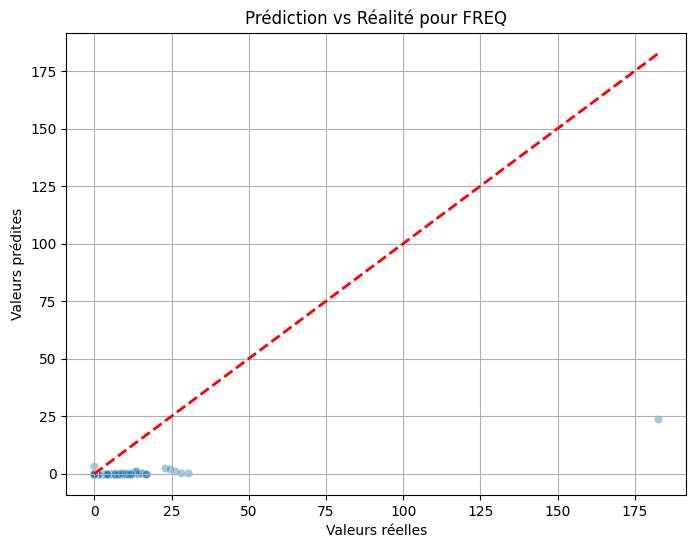

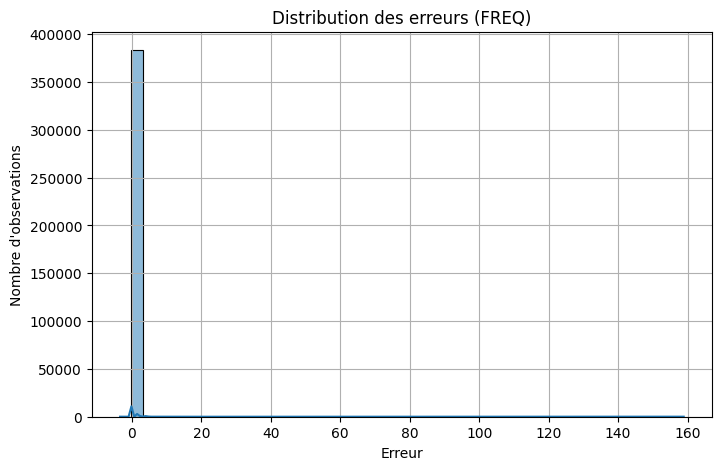

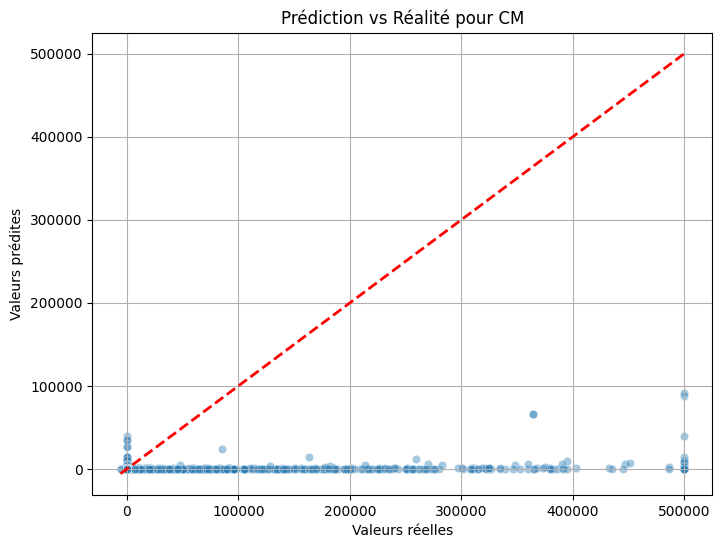

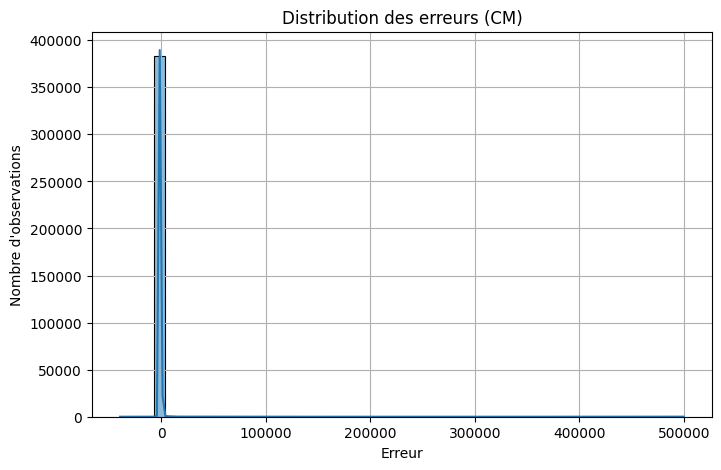

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_3696\324478461.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




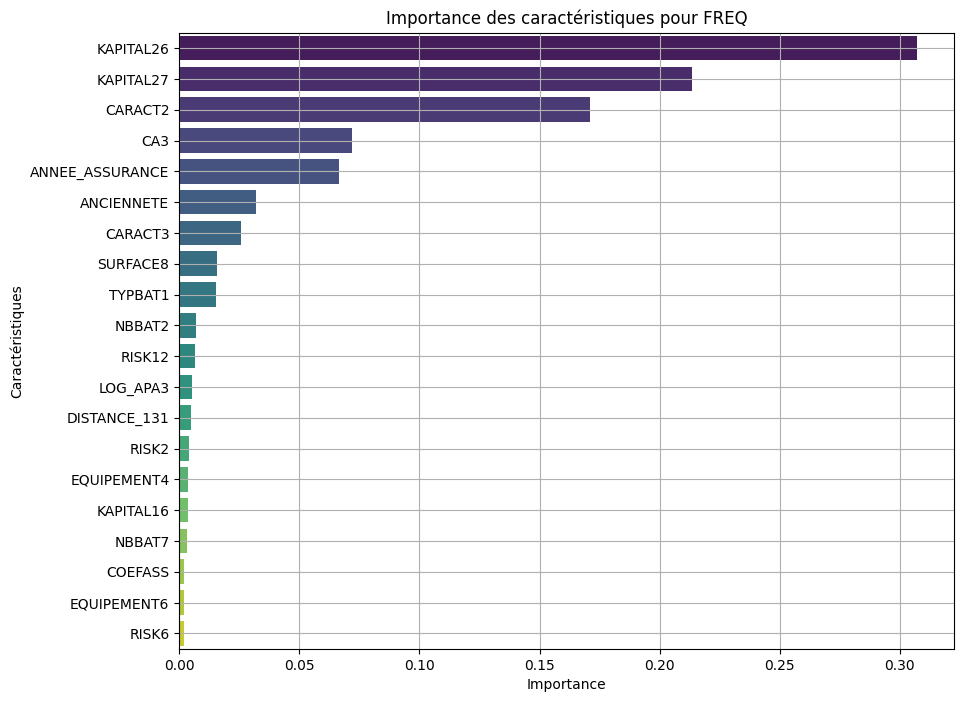

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_3696\324478461.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




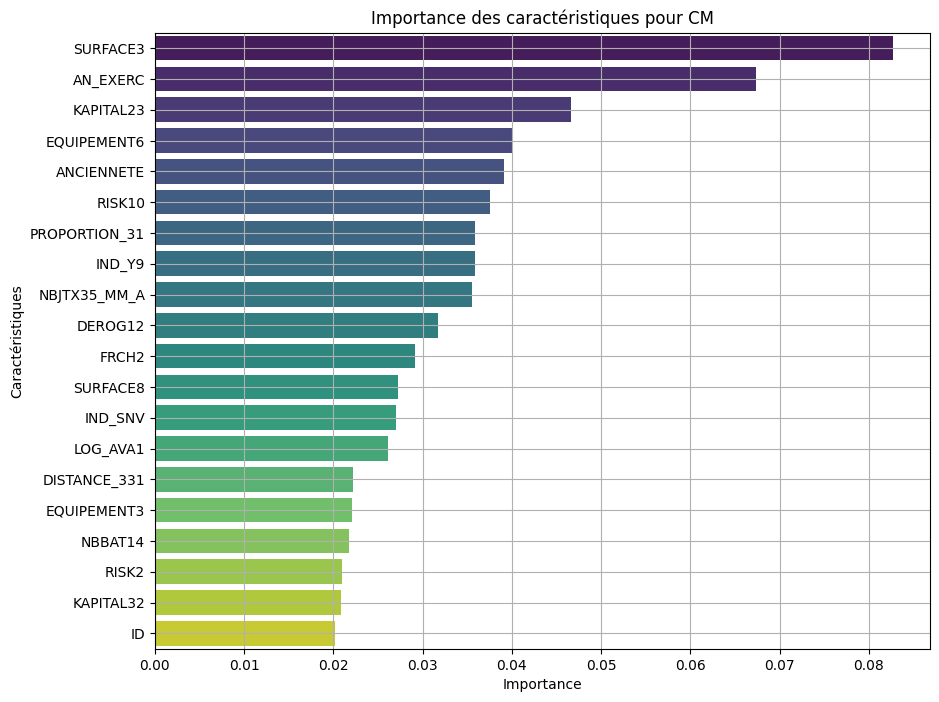

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphiques pour visualiser les r√©sultats sur l'ensemble d'entra√Ænement

# Fonction pour tracer les r√©sultats
def plot_results(y_true, y_pred, title, xlabel="Valeurs r√©elles", ylabel="Valeurs pr√©dites"):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.4)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

# R√©sultats pour FREQ
plot_results(y_train_freq, y_pred_train_freq, "Pr√©diction vs R√©alit√© pour FREQ")

# Distribution des erreurs FREQ
plt.figure(figsize=(8, 5))
sns.histplot(y_train_freq - y_pred_train_freq, bins=50, kde=True)
plt.title("Distribution des erreurs (FREQ)")
plt.xlabel("Erreur")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

# R√©sultats pour CM
plot_results(y_train_cm, y_pred_train_cm, "Pr√©diction vs R√©alit√© pour CM")

# Distribution des erreurs CM
plt.figure(figsize=(8, 5))
sns.histplot(y_train_cm - y_pred_train_cm, bins=50, kde=True)
plt.title("Distribution des erreurs (CM)")
plt.xlabel("Erreur")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

# Importance des caract√©ristiques (Feature Importance)
def plot_feature_importance(model, feature_names, title):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]
    plt.figure(figsize=(10, 8))
    sns.barplot(x=importance[sorted_idx][:20], y=np.array(feature_names)[sorted_idx][:20], palette="viridis")
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Caract√©ristiques")
    plt.grid(True)
    plt.show()

# Importance des features pour FREQ
plot_feature_importance(model_freq, X_train_base.columns, "Importance des caract√©ristiques pour FREQ")

# Importance des features pour CM
plot_feature_importance(model_cm, X_train_freq.columns, "Importance des caract√©ristiques pour CM")

## üìä M√©triques d'√©valuation du mod√®le

### 1Ô∏è‚É£ R¬≤ (Coefficient de D√©termination)
- **Formule** : \( R^2 = 1 - \frac{\sum (y_{\text{r√©el}} - y_{\text{pr√©dit}})^2}{\sum (y_{\text{r√©el}} - \bar{y})^2} \)
- **Interpr√©tation** :
  - \( R^2 = 1 \) ‚Üí Mod√®le parfait
  - \( R^2 = 0 \) ‚Üí Aussi bon que la moyenne
  - \( R^2 < 0 \) ‚Üí Mod√®le inefficace

---

### 2Ô∏è‚É£ RMSE (Root Mean Squared Error)
- **Formule** : \( RMSE = \sqrt{\frac{1}{N} \sum (y_{\text{r√©el}} - y_{\text{pr√©dit}})^2} \)
- **Interpr√©tation** :
  - Erreur moyenne pond√©r√©e (sensibilit√© aux grandes erreurs)
  - M√™me unit√© que \( y \) ‚Üí Facile √† interpr√©ter
  - Plus **faible**, mieux c‚Äôest

---

### 3Ô∏è‚É£ MAE (Mean Absolute Error)
- **Formule** : \( MAE = \frac{1}{N} \sum |y_{\text{r√©el}} - y_{\text{pr√©dit}}| \)
- **Interpr√©tation** :
  - Erreur moyenne absolue (moins sensible aux grandes erreurs)
  - Plus **faible**, mieux c‚Äôest

---

### üöÄ **Quelle m√©trique choisir ?**
| **M√©trique** | **Interpr√©tation** | **Objectif** |
|-------------|------------------|-------------|
| **R¬≤** | Variance expliqu√©e | Proche de **1** |
| **RMSE** | Impact des grandes erreurs | **Faible** |
| **MAE** | Erreur moyenne absolue | **Faible** |